In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

# Experiments

In [5]:
methods = [ 'kmeans', 'gmm_full', 'gmm_tied', 'gmm_diag', 'gmm_spherical']
list_n_cluster = np.arange(2,8,1)
list_n_cluster

array([2, 3, 4, 5, 6, 7])

In [6]:
# Create Empty Dictionary
dict_results = {}
for method in methods:
  dict_temp = {}
  for n_cluster in list_n_cluster:
    dict_entry = {'silhouette_score': np.nan, 'ch_score': np.nan, 'db_score': np.nan, 'model_specific_score': np.nan}
    dict_temp.update({n_cluster:dict_entry})
  dict_results.update({method: dict_temp})

In [7]:
# Experiments
cov_type='full'
for method in methods:
  method_name = method
  if method[:3]=='gmm':
    method_name = method.rsplit('_')[0]
    cov_type = method.rsplit('_')[1]
  for n_cluster in list_n_cluster:
    df, cluster_input_cols, answers_train, answers, labels, model_specific_score = get_cluster_data(n_cluster=n_cluster, method=method_name, cov_type=cov_type, cluster_input_data='fa_data', start_train='2020-07-31', end_train='2020-12-01')
    dict_results[method][n_cluster]['silhouette_score'] = metrics.silhouette_score(answers, labels, metric='euclidean')
    dict_results[method][n_cluster]['ch_score'] = metrics.calinski_harabasz_score(answers, labels)
    dict_results[method][n_cluster]['db_score'] = metrics.davies_bouldin_score(answers, labels)
    dict_results[method][n_cluster]['model_specific_score'] = model_specific_score

In [8]:
# Transform Dictionary to DataFrame
df_results = pd.DataFrame(columns=['method', 'number_cluster', 'silhouette_score', 'ch_score', 'model_specific_score'])
for method in methods:
  df_temp = pd.DataFrame.from_dict(dict_results[method], orient='index')
  df_temp['number_cluster'] = df_temp.index
  df_temp['method'] = method
  df_results = df_results.append(df_temp)
df_results.reset_index(inplace=True, drop=True)
df_results

,method,number_cluster,silhouette_score,ch_score,model_specific_score,db_score
0,kmeans,2,0.186779,10527.528672,9059.162225,1.999955
1,kmeans,3,0.154183,9623.584488,7948.780438,1.793589
2,kmeans,4,0.158106,8109.902527,7356.830590,1.800400
3,kmeans,5,0.143775,7359.362659,6870.970767,1.740345
4,kmeans,6,0.150352,6973.048029,6437.537592,1.676316
5,kmeans,7,0.139548,6653.131497,6081.976652,1.634267
6,gmm_full,2,0.160660,6216.001451,-124545.218055,2.639429
7,gmm_full,3,0.023151,4081.257193,-132901.624673,3.759707
8,gmm_full,4,0.036389,3876.857273,-137174.026087,3.197720
9,gmm_full,5,0.019658,3436.211298,-172582.693035,3.439417


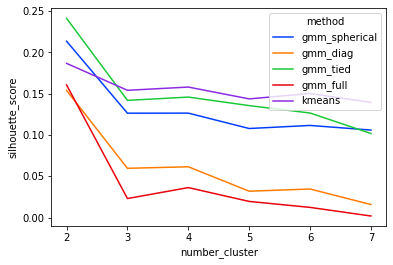

In [9]:
sns.lineplot(data=df_results.iloc[::-1], x='number_cluster', y='silhouette_score', hue='method', palette='bright') # Close to 1

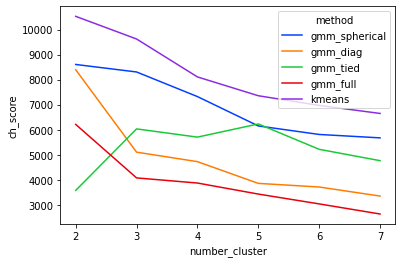

In [10]:
sns.lineplot(data=df_results.iloc[::-1], x='number_cluster', y='ch_score', hue='method', palette='bright') # Maximize

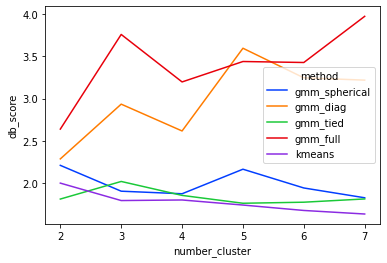

In [11]:
sns.lineplot(data=df_results.iloc[::-1], x='number_cluster', y='db_score', hue='method', palette='bright') # close to zero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


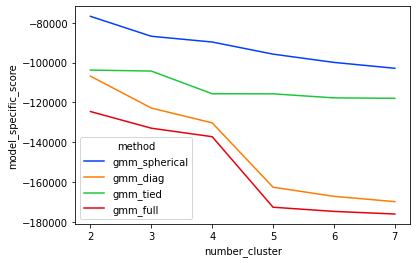

In [12]:
sns.lineplot(data=df_results.iloc[::-1][df_results['method']!='kmeans'], x='number_cluster', y='model_specific_score', hue='method', palette='bright') # BIC - Minimize / find elbow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


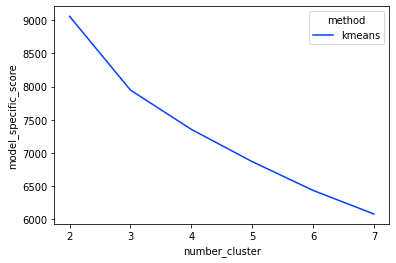

In [13]:
sns.lineplot(data=df_results.iloc[::-1][df_results['method']=='kmeans'], x='number_cluster', y='model_specific_score', hue='method', palette='bright') # Find elbow

In [14]:
df_results.to_csv('results/clustering/results_clustering.csv', index=False)

# Test Rand Score

In [16]:
cov_types = ['full', 'tied', 'diag', 'spherical']
avg_rand_scores = []
for n_cluster in list_n_cluster:
  cum_rand_scores = 0
  for cov_type_1 in cov_types:
    csv_path_1 = 'data/clustering/' + 'GMM_' + str(n_cluster) + '_cluster_cov_type_' + cov_type_1 + '.csv'
    df_1 = pd.read_csv(csv_path_1)
    labels_1 = df_1['group'].to_numpy()
    for cov_type_2 in cov_types:
      csv_path_2 = 'data/clustering/' + 'GMM_' + str(n_cluster) + '_cluster_cov_type_' + cov_type_2 + '.csv'
      df_2 = pd.read_csv(csv_path_2)
      labels_2 = df_2['group'].to_numpy()
      rand_score = metrics.adjusted_rand_score(labels_1, labels_2)
      
      #print(str(n_cluster) + ' Cluster - Comparing ' + cov_type_1 + ' with ' + cov_type_2 + ' - Rand Score: ' + str(rand_score))
      cum_rand_scores = cum_rand_scores + rand_score
  avg_rand_score = (cum_rand_scores-1)/((len(cov_types)-1)*len(cov_types))
  avg_rand_scores.append(avg_rand_score)
  print(str(n_cluster) + ' Cluster with average rand score: ' + str(avg_rand_score))

2 Cluster - Comparing full with full - Rand Score: 1.0
2 Cluster - Comparing full with tied - Rand Score: 0.13339267295667145
2 Cluster - Comparing full with diag - Rand Score: 0.5293805530730749
2 Cluster - Comparing full with spherical - Rand Score: 0.4094184911993189
2 Cluster - Comparing tied with full - Rand Score: 0.13339267295667145
2 Cluster - Comparing tied with tied - Rand Score: 1.0
2 Cluster - Comparing tied with diag - Rand Score: 0.04902969863187143
2 Cluster - Comparing tied with spherical - Rand Score: 0.14187654484378062
2 Cluster - Comparing diag with full - Rand Score: 0.5293805530730749
2 Cluster - Comparing diag with tied - Rand Score: 0.04902969863187143
2 Cluster - Comparing diag with diag - Rand Score: 1.0
2 Cluster - Comparing diag with spherical - Rand Score: 0.4098009323741657
2 Cluster - Comparing spherical with full - Rand Score: 0.4094184911993189
2 Cluster - Comparing spherical with tied - Rand Score: 0.14187654484378062
2 Cluster - Comparing spherical wi

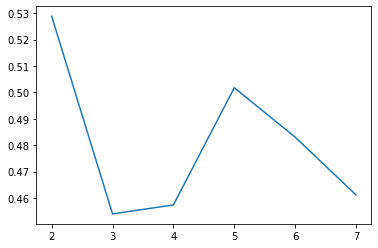

In [17]:
plt.plot(list_n_cluster, avg_rand_scores)
plt.show()